In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
%store -r data

In [3]:
data = data.sample(n = 10000)
X = data.drop(' shares', axis = 1)
Y = data[' shares']

In [4]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
X_normalized = normalize(X)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['C1', 'C2']
X_pca

,C1,C2
0,-0.113130,-0.239193
1,-0.145633,-0.206003
2,-0.131704,0.062788
3,-0.038394,-0.034578
4,0.237848,0.023468
...,...,...
9995,0.273296,-0.070597
9996,-0.076148,-0.218355
9997,0.266787,-0.018493
9998,-0.128351,0.137945


In [6]:
knn = NearestNeighbors(n_neighbors = 4).fit(X)
neigh_dist, neigh_ind = knn.kneighbors(X)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

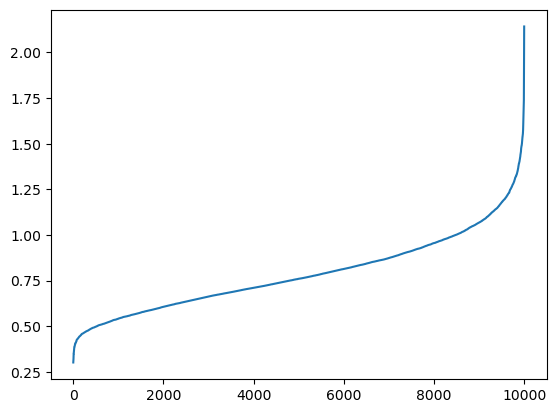

In [7]:
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.show()

In [8]:
knee = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online = True)
print(knee.knee_y)
eps = knee.knee_y

1.542290247506221


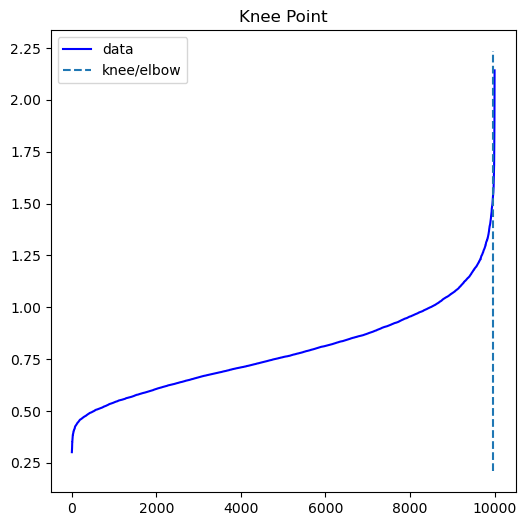

In [9]:
knee.plot_knee()
plt.show()

In [10]:
db = DBSCAN(eps = eps, min_samples = 4).fit(X)

In [11]:
print(set(db.labels_))
Counter(db.labels_) # value of -1 represents noise
print(silhouette_score(X, db.labels_))

{0, 1, 2, 3, 4, -1}
0.11594680958035743


<AxesSubplot:xlabel='C1', ylabel='C2'>

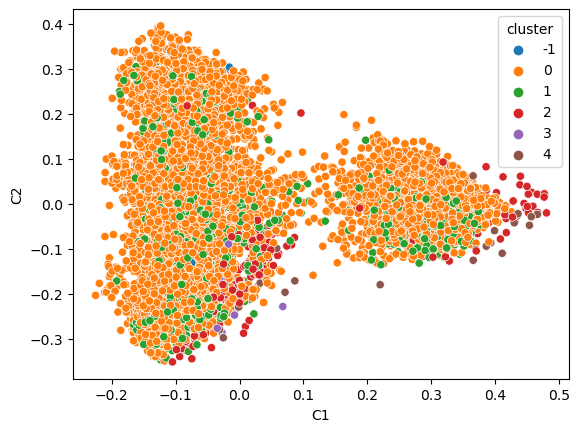

In [12]:
X_pca['cluster'] = pd.Categorical(db.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [13]:
best_score = float('-inf')
best_model = None
eps_values = [0.3, 0.5, 0.7, 0.9, 1, 1.2, 1.4, 1.6, 1.8, 1.9, 2, 2.5, 3, 4]

for eps in eps_values:
    for min_samples in range(2, 11):
        model = DBSCAN(eps = eps, min_samples = min_samples)
        
        model.fit(X)
        
        if(len(set(model.labels_)) == 1 or len(set(model.labels_)) > 4):
            continue
        
        score = silhouette_score(X, model.labels_)
            
        if score > best_score:
            best_score = score
            best_model = model
        
        print(f'{min_samples}, {eps} -> {score}')

2, 1.8 -> 0.21356566137814528
3, 1.8 -> 0.21356566137814528
4, 1.8 -> 0.21356566137814528
5, 1.8 -> 0.21356566137814528
6, 1.8 -> 0.21356566137814528
7, 1.8 -> 0.21356566137814528
8, 1.8 -> 0.21356566137814528
9, 1.8 -> 0.21356566137814528
10, 1.8 -> 0.21356566137814528
2, 1.9 -> 0.20816819276453616
3, 1.9 -> 0.20816819276453616
4, 1.9 -> 0.20816819276453616
5, 1.9 -> 0.20816819276453616
6, 1.9 -> 0.20816819276453616
7, 1.9 -> 0.20816819276453616
8, 1.9 -> 0.20816819276453616
9, 1.9 -> 0.20816819276453616
10, 1.9 -> 0.20816819276453616
2, 2 -> 0.20816819276453616
3, 2 -> 0.20816819276453616
4, 2 -> 0.20816819276453616
5, 2 -> 0.20816819276453616
6, 2 -> 0.20816819276453616
7, 2 -> 0.20816819276453616
8, 2 -> 0.20816819276453616
9, 2 -> 0.20816819276453616
10, 2 -> 0.20816819276453616


In [14]:
print(best_score)
print(best_model)

0.21356566137814528
DBSCAN(eps=1.8, min_samples=2)


<AxesSubplot:xlabel='C1', ylabel='C2'>

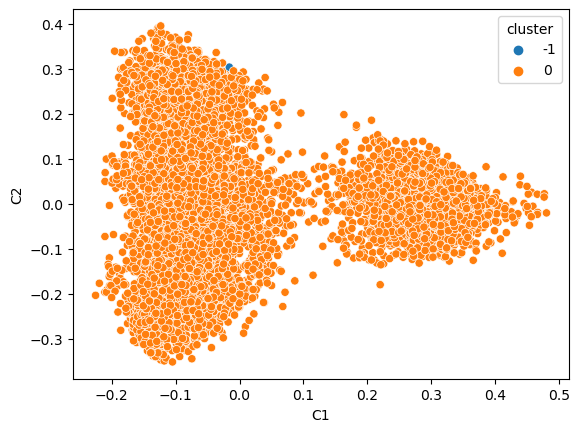

In [15]:
X_pca['cluster'] = pd.Categorical(best_model.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [16]:
%store db
db2 = best_model
%store db2

Stored 'db' (DBSCAN)
Stored 'db2' (DBSCAN)
